In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Datasets/weatherHistory.csv")

In [3]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
df.shape

(96453, 12)

In [5]:
df["Precip Type"].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [6]:
df.isna().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [7]:
df=pd.get_dummies(df,columns=["Precip Type"],dummy_na=True,drop_first=True)

In [8]:
df.head()

,Formatted Date,Summary,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Precip Type_snow,Precip Type_nan
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,0,0
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,0,0
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,0,0
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,0,0
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,0,0


In [9]:
#dropping unnecessary features /can't be proccessed by pyhton 
df.drop(["Formatted Date","Daily Summary","Loud Cover","Summary"],inplace=True,axis=1)


In [15]:
import statsmodels.api as sm
y=df["Apparent Temperature (C)"]
X=df.drop(["Apparent Temperature (C)"],axis=1)

In [19]:
X=sm.add_constant(X) #adding intercept
X.head()

,const,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Precip Type_snow,Precip Type_nan
0,1.0,9.472222,0.89,14.1197,251.0,15.8263,1015.13,0,0
1,1.0,9.355556,0.86,14.2646,259.0,15.8263,1015.63,0,0
2,1.0,9.377778,0.89,3.9284,204.0,14.9569,1015.94,0,0
3,1.0,8.288889,0.83,14.1036,269.0,15.8263,1016.41,0,0
4,1.0,8.755556,0.83,11.0446,259.0,15.8263,1016.51,0,0


In [20]:
res=sm.OLS(y,X).fit()

In [21]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Apparent Temperature (C)   R-squared:                       0.990
Model:                                  OLS   Adj. R-squared:                  0.990
Method:                       Least Squares   F-statistic:                 1.188e+06
Date:                      Fri, 25 Jun 2021   Prob (F-statistic):               0.00
Time:                              11:21:11   Log-Likelihood:            -1.4356e+05
No. Observations:                     96453   AIC:                         2.871e+05
Df Residuals:                         96444   BIC:                         2.872e+05
Df Model:                                 8                                         
Covariance Type:                  nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2.2295      0.041    -54.009      0.000      -2.310      -2.149
Temperature (C)            1.1158      0.001   1930.995      0.000       1.115       1.117
Humidity                   0.8413      0.025     33.886      0.000       0.793       0.890
Wind Speed (km/h)         -0.0979      0.001   -184.632      0.000      -0.099      -0.097
Wind Bearing (degrees)     0.0005   3.24e-05     16.260      0.000       0.000       0.001
Visibility (km)           -0.0049      0.001     -5.307      0.000      -0.007      -0.003
Pressure (millibars)       0.0002   2.96e-05      7.025      0.000       0.000       0.000
Precip Type_snow          -0.4379      0.014    -31.607      0.000      -0.465      -0.411
Precip Type_nan            0.3574      0.047      7.541      0.000       0.265       0.450
==============================================================================
Omnibus:                     3161.195   Durbin-Watson:                   0.440
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3605.885
Skew:                           0.425   Prob(JB):                         0.00
Kurtosis:                       3.417   Cond. No.                     1.41e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

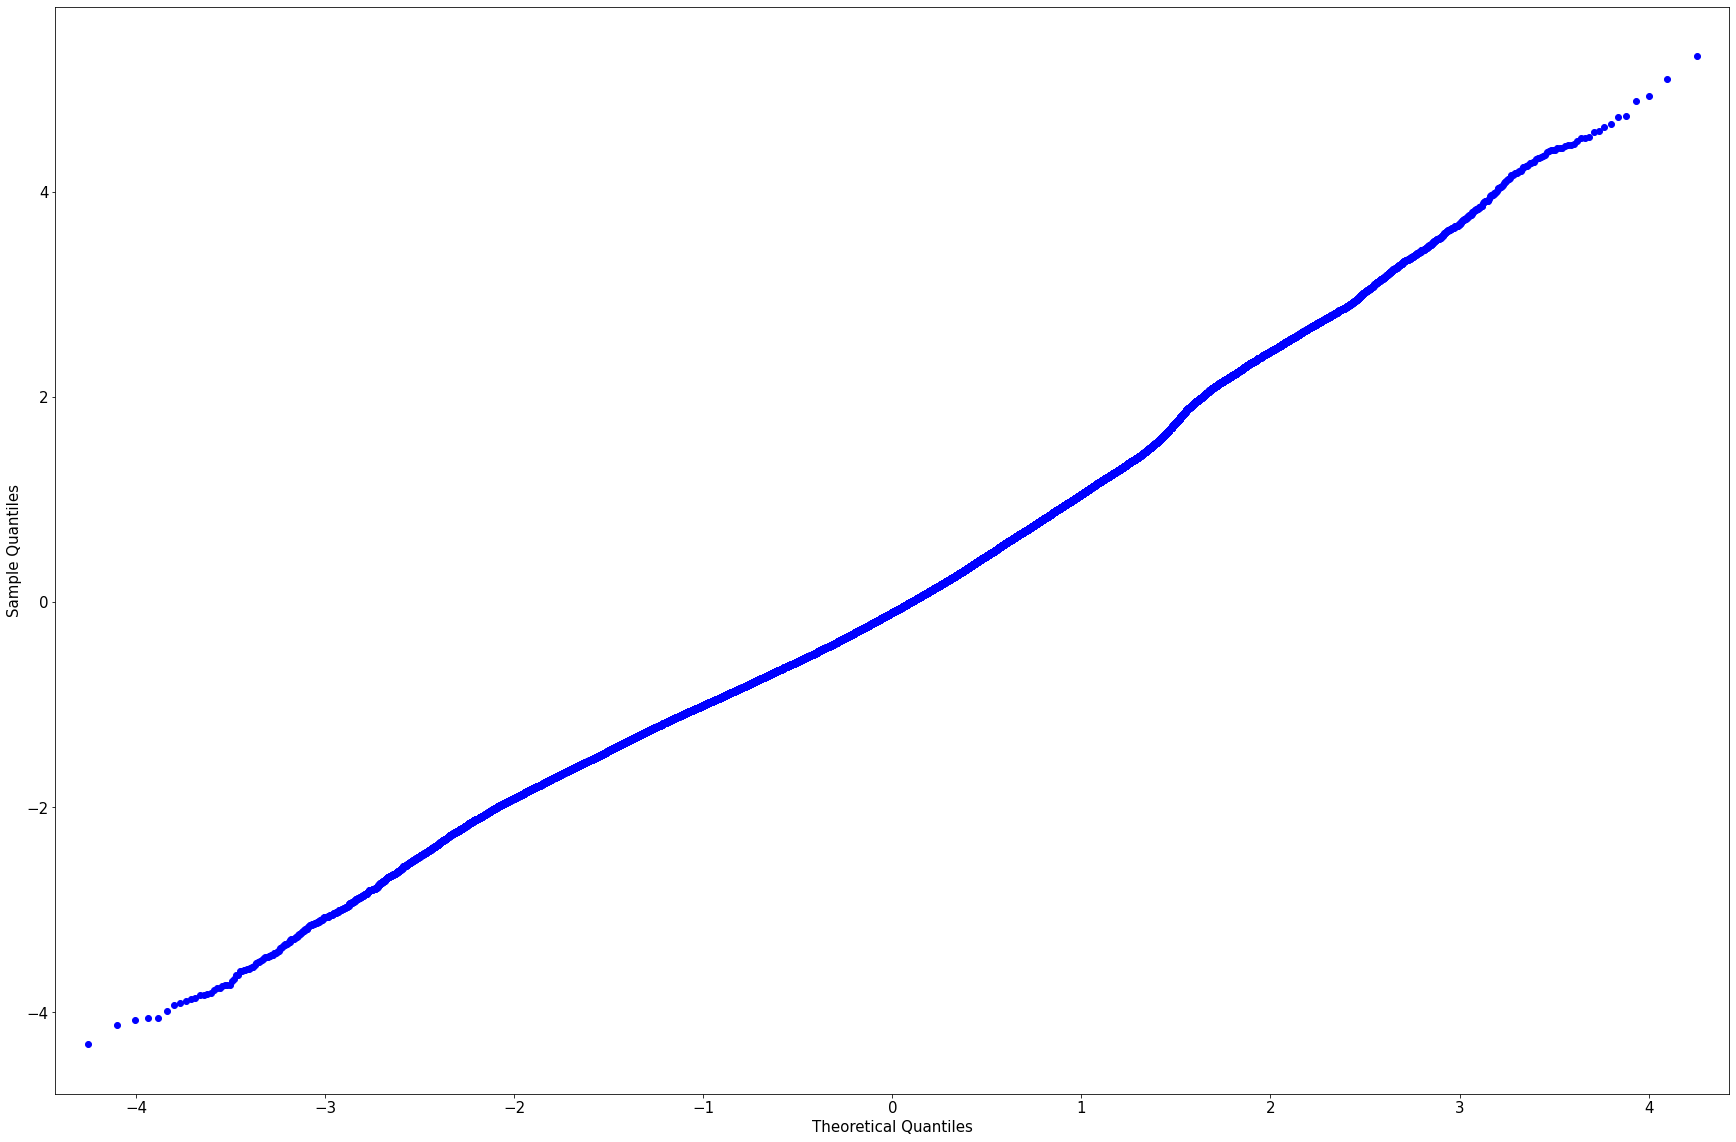

In [28]:
fig=sm.qqplot(res.resid)
plt.show()

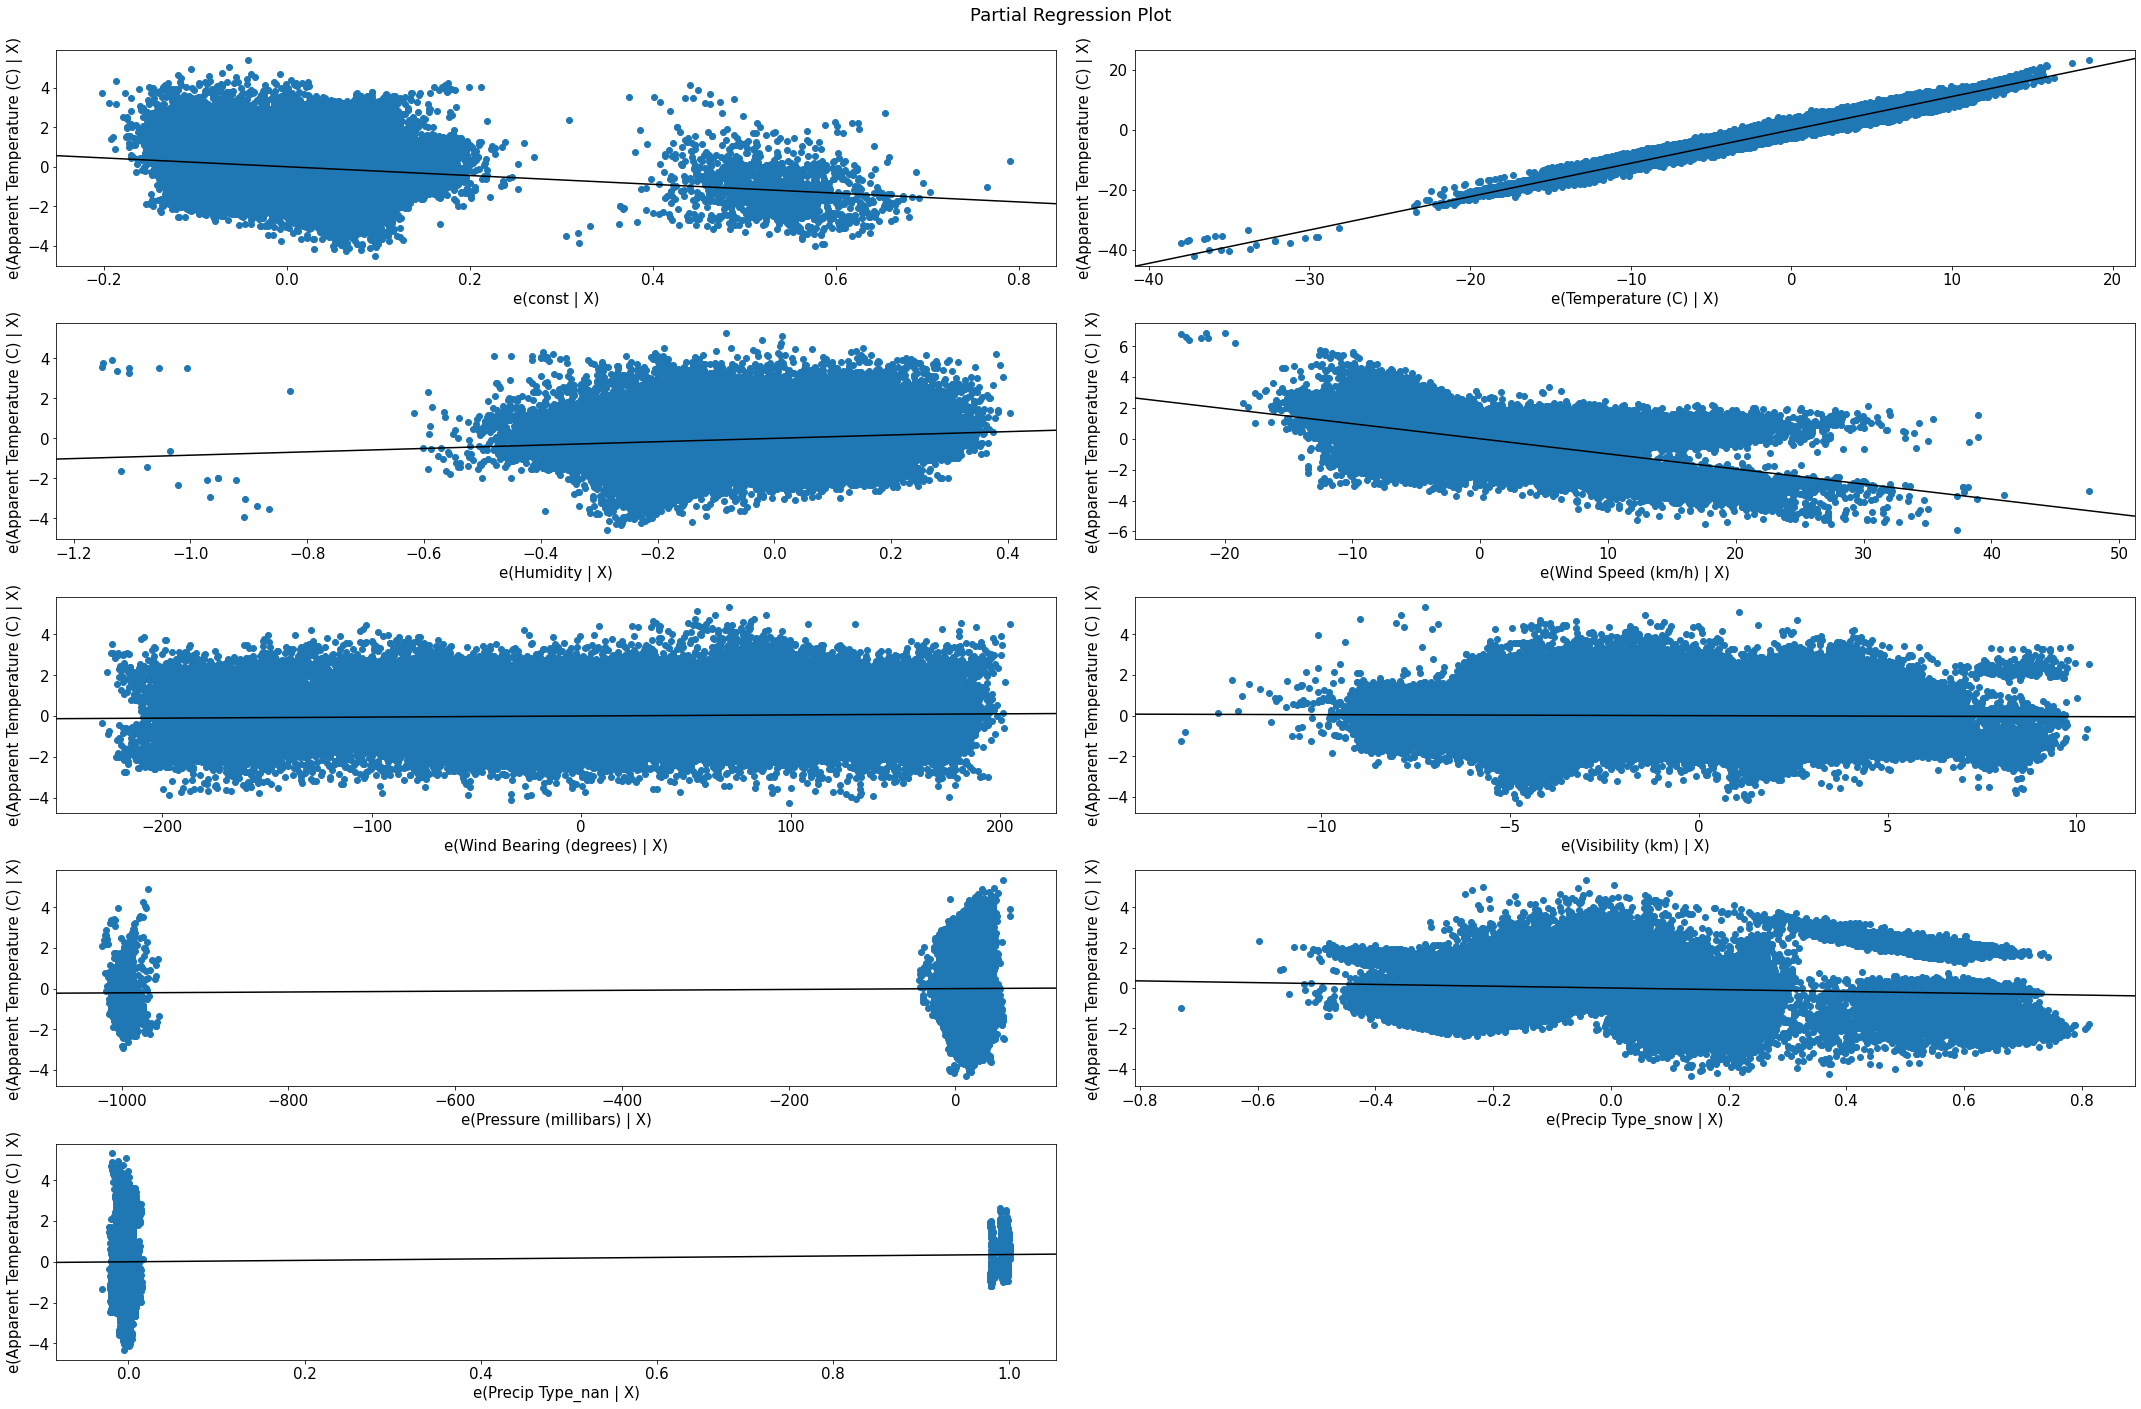

In [26]:
plt.rc("figure", figsize=(30,20))
plt.rc("font", size=15)
fig = sm.graphics.plot_partregress_grid(res)

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model=LinearRegression()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
model.fit(X_train,y_train)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(y_test,model.predict(X_test)))
print(rmse)

In [ ]:
print(model.score(X_test,y_test))
print(model.score(X_train,y_train))

In [ ]:
from sklearn.model_selection import cross_val_score
mse=cross_val_score(model,X,y,scoring="neg_root_mean_squared_error",cv=5)
mse=np.mean(mse)
print(mse)

# Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()

param={'alpha':[1e-10,1e-5,1e-1,1,5,10,20,40,50,70,80,90,95,100,105,110,115,120,125,128,130,131,132,133,135,136,137,140,150,200]}

ridge=GridSearchCV(ridge,param,scoring="neg_mean_squared_error",cv=5)
ridge.fit(X,y)


In [ ]:
print(ridge.best_params_)
print(ridge.best_score_)

# Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
lasso=Lasso()
param={'alpha':[1e-10,1e-5,1e-1,1,5,10,20,40,50,70,80,90,95,100,105,110,115,120,125,128,130,131,132,133,135,136,137,140,150,200]}
lasso=GridSearchCV(lasso,param,scoring="neg_root_mean_squared_error",cv=5)
lasso.fit(X,y)

In [ ]:
print(lasso.best_params_)
print(lasso.best_score_)